# Fractals and Julia Sets

In this unit we explore iterations and the images that one can generate with them. 

## A Fractal from Pascal's Triangle
Before we take up Newton's method and continuous mathematics and the [fractals](https://en.wikipedia.org/wiki/Fractal) that can be generated, let's begin with something simpler:  Pascal's triangle, attributed to [Blaise Pascal](https://en.wikipedia.org/wiki/Blaise_Pascal), although it was certainly known before that: see the Wikipedia entry on [Halayudha](https://en.wikipedia.org/wiki/Halayudha) who clearly described it in the 10th century CE, commenting on the work of [Acharya Pingala](https://en.wikipedia.org/wiki/Pingala) from the 3rd/2nd century BCE; Pingala seems to have been the first to write about _binary_ numbers, which we will also use here.

In any case, the triangle of binomial coefficients $\binom{n}{m}$ from the binomial theorem can be written
<center> 1 </center>
<center> 1,1 </center>
<center> 1,2,1 </center>
<center> 1,3,3,1 </center>
<center> 1,4,6,4,1 </center>
<center> 1,5,10,10,5,1 </center>
<center> 1,6,15,20,15,6,1 </center>
<center> 1,7,21,35,35,21,7,1 </center>

and so on.  The $n$th row contains the coefficients of $(a + b)^n$ when expanded: $a^n + \binom{n}{1}a^{n-1}b + \binom{n}{2} a^{n-2}b^2 +  \cdots + \binom{n}{n-1}a b^{n-1} + b^n$. So far so good, and this should be familiar from high school.  No fractals so far, though.

One idea pursued in the 19th century was to investigate the evenness or oddness of binomial coefficients.  So, instead of taking that triangle literally, we instead write $1$ if the number is odd, and $0$ if the number is even; this is the beginnings of modular arithmetic.  One can compute this in Maple (and Python); in Maple the modulo operator is called `mod` while in Python it is called `%`.  When we take the binomial coefficient triangle mod 2, we get
<center> 1 </center>
<center> 1,1 </center>
<center> 1,0,1 </center>
<center> 1,1,1,1 </center>
<center> 1,0,0,0,1 </center>
<center> 1,1,0,0,1,1 </center>
<center> 1,0,1,0,1,0,1 </center>
<center> 1,1,1,1,1,1,1,1 </center>

Still not seeing a fractal---but that's because we're just getting started.  If we go to 16 rows instead of the 8 above, we get (by the following Maple command)

```{image} ../Figures/Fractals/sierpinskibinomial_image0.png
:height: 300px
:alt: Maple command for 16 by 16 matrix
:align: center
```

The binomial triangle is tilted over to the left, and we have a bunch of wasted space in the upper triangular part of the matrix, but that's ok.  Now we make an image out of that: every entry with a $1$ gets a black square, and every entry with a $0$ is left blank.

```{image} ../Figures/Fractals/sierpinskibinomial_image1.png
:height: 300px
:alt: Maple browse image 16
:align: center
```

Now let's try a $32$ by $32$ version:

```{image} ../Figures/Fractals/sierpinskibinomial_image2.png
:height: 300px
:alt: Maple browse image 32
:align: center
```

Bigger yet, $64$ by $64$

```{image} ../Figures/Fractals/sierpinskibinomial_image3.png
:height: 300px
:alt: Maple browse image 64
:align: center
```

$128$ by $128$

```{image} ../Figures/Fractals/sierpinskibinomial_image4.png
:height: 300px
:alt: Maple browse image 128
:align: center
```

$256$ by $256$

```{image} ../Figures/Fractals/sierpinskibinomial_image5.png
:height: 300px
:alt: Maple browse image 256
:align: center
```

$512$ by $512$

```{image} ../Figures/Fractals/sierpinskibinomial_image6.png
:height: 300px
:alt: Maple browse image 512
:align: center
```

Each successive image contains three half-size copies of the image before, surrounding the triangle in the middle.  The details get finer and finer with each increase in the amount of data.  This figure is called [The Sierpinski Triangle](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle), named after [Waclaw Sierpinski](https://en.wikipedia.org/wiki/Wac%C5%82aw_Sierpi%C5%84ski).  In the limit as the number of rows goes to infinity, the figure becomes a _fractal_, an object that does not have an integer dimension.  It's a bit startling that this object arises out of a combinatorial discussion with integers mod 2!

One can do other things with binomial coefficients to produce fractals---see the beautiful paper ["Zaphod Beeblebrox's Brain and the $59$th row of Pascal's Triangle"](https://www.jstor.org/stable/2324898) by Andrew Granville; and one wonders if similar things can happen with other common combinatorial numbers such as Stirling numbers or Eulerian numbers or, well, you get the idea, even if you don't know just what those other numbers are, yet.

See also [Stephen Wolfram's 1984 paper](https://www.jstor.org/stable/2323743) which contains several pictures of this kind, and quite a bit of information on the "fractal dimension" of these figures.  That paper also makes a connection to what are known as "cellular automata".

(JuliaSetActivity-1)=

```{admonition} Julia Set Activity 1
:class: tip
_Write a Python program to draw the Sierpinski gasket (perhaps by using binomial coefficients mod 2)_.
{ref}`[What happened when we did this] <JuliaSetActivityReport-1>`
```

(JuliaSetActivity-2)=

```{admonition} Julia Set Activity 2
:class: tip
Explore pictures of the binomial coefficients mod 4 (and then consult Andrew Granville's paper "Zaphod Beeblebrox's Brain..." previously referenced)
{ref}`[What happened when we did this] <JuliaSetActivityReport-2>`
```

(JuliaSetActivity-3)=

```{admonition} Julia Set Activity 3
:class: tip
Investigate pictures (mod 2 or otherwise) of other combinatorial families of numbers, such as [Stirling Numbers](https://en.wikipedia.org/wiki/Stirling_number) (both kinds).  Try also "Eulerian numbers of the first kind" mod 3.
{ref}`[What happened when we did this] <JuliaSetActivityReport-3>`
```

## Newton's method, Fractals, and Chaos

Newton's method is not perfect.  If we ask it to do something impossible, such as find a real root of $f(x) = x^2+1 = 0$, it can go to infinity (if any $x_n = 0$, then we divide by zero on the next iterate because $f'(0)=0$); it can _cycle_ as in the graph below; or it can wander "chaotically".

$$
x_{n+1} = x_n - \frac{x_n^2+1}{2x_n} = \frac12\left( x_n - \frac{1}{x_n}\right)
$$

```{figure} ../Figures/Fractals/Period3Animation.gif
---
height: 400px
name: periodic3animation
---
Animation of Newton's Method on $x^2+1=0$ with a period-3 orbit
```

Consider the polynomial $p(x) = x^5 + 3x + 2$, and consider the following Python implementation of 8 iterations of Newton's method to find a zero, starting from the initial estimate $x_0 = -1.0$.

In [1]:
import numpy as np
from numpy.polynomial import Polynomial as Poly
p = Poly( [2, 3, 0, 0, 0, 1])
dp= p.deriv()
print( p )
print( dp ) # Python polynomials know how to differentiate themselves
x = np.zeros( 8 ) # Try 8 iterations, why not
x[0] = -1.0 # Initial estimate for a root
for j in range(1,8):
    x[j] = x[j-1] - p( x[j-1])/dp( x[j-1] )
print( x )
print( p(x) )

2.0 + 3.0 x**1 + 0.0 x**2 + 0.0 x**3 + 0.0 x**4 + 1.0 x**5
3.0 + 0.0 x**1 + 0.0 x**2 + 0.0 x**3 + 5.0 x**4
[-1.         -0.75       -0.64364876 -0.632914   -0.63283452 -0.63283452
 -0.63283452 -0.63283452]
[-2.00000000e+00 -4.87304688e-01 -4.14163790e-02 -3.02195989e-04
 -1.60124998e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00]


That was pretty straightforward, once the initial estimate (-1.0) was chosen.  In your numerical analysis class you will study the behaviour of Newton's iteration in general: it is a very powerful method used not just for single polynomials as here but also for _systems_ of nonlinear equations.  Here, though, it's both _overkill_ and _underwhelming_: for roots of polynomials, we really want to find _all_ the roots.  Of course, Python has a built-in method to do that:

(How does it work, you ask? We will find out, when we talk about _eigenvalues_ in the next unit)

In [2]:
p.roots()

array([-0.74846849-0.99543395j, -0.74846849+0.99543395j,
       -0.63283452+0.j        ,  1.06488575-0.95054603j,
        1.06488575+0.95054603j])

We see that four out of the five roots of that particular polynomial were complex, but our Newton iteration got the real root nicely.  If we wanted instead to get the complex roots, we would have had to use a _complex initial estimate_ because---since the coefficients of the polynomial are real---the Newton iteration stays real if the initial estimate is real.  So, without knowing the roots, how do we get an initial estimate?

Here is where this OER departs from the standard curriculum: we instead ask _what happens if we take every possible initial estimate_?  This generates something typically known as the "Newton Fractal" for a function---to a pure mathematician analyst, this is more likely to be termed a "Fatou set", named after the French astronomer [Pierre Fatou](https://en.wikipedia.org/wiki/Pierre_Fatou); the notions are a bit distinct, but if we are using Newton's method to find the roots of a polynomial, the resulting Newton fractal is indeed a "Fatou set".  The exact definition of a Fatou set is given in the Wikipedia page for "Julia Set", which we will cite below; for now, let's just use the term "Newton Fractal".

The following program is not intended as a "full-featured-fractal" program.  It is meant to get you off the ground: it uses nested loops, and numpy arrays, and the "filled contour plot" from matplotlib to plot the basins of attraction for Newton's method applied to a simple function, $x^3-2$.  This function has three roots, two of which are complex.  We hand-supply the derivative in this case.  Every initial point which goes to the real root (in twenty iterations) gets coloured red; every initial point which goes to the complex root $(-1/2 + i\sqrt{3}/2)\sqrt{2}$ is coloured yellow; every initial point which goes to the complex conjugate of that last root gets coloured brown.  All of the points which (after twenty iterations) are still undecided are coloured various other colours.  You will be asked to improve this code in the exercises (this includes the possibility of throwing it all out and writing your own from scratch).

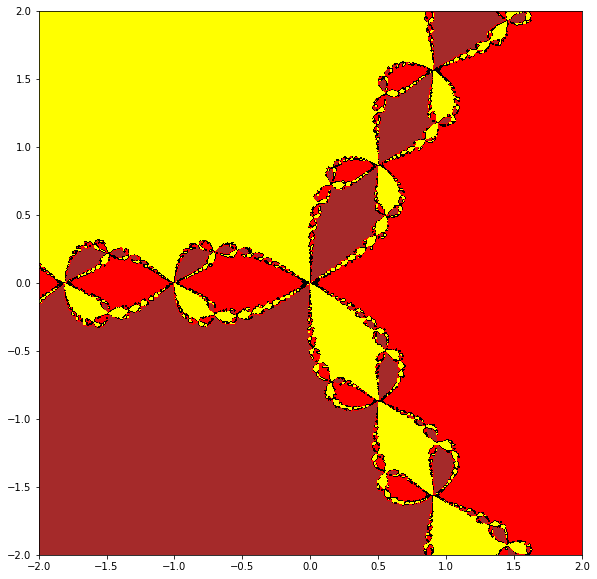

In [3]:
# A very short hacky program to draw the edges of a Newton fractal
# RMC 2021.12.20
import numpy as np
from matplotlib import pyplot as plt
# We will take an N by N grid of initial estimates
N = 600  # 800 by 800 is a lot and it takes a few seconds to draw 
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
F = np.zeros((N,N))
# Here is the function and its derivative whose zeros we are looking for
f = lambda x: x ** 3 - 2;
df = lambda x: 3*x**2 ;
# SirIsaac performs one Newton iteration
SirIsaac = lambda x: x - f(x)/df(x);
for k in range(N):
    for i in range(N):
        # We range over all initial estimates in the grid
        z = x[i]+1j*y[k];
        # Hard-wire in 20 iterations (maybe not enough)
        for m in range(20):
            z = SirIsaac( z )
        # After twenty iterations we hope the iteration has settled down, except on
        # the boundary between basins of attraction.
        # The phase (angle) is a likely candidate for a unique identifier for the root
        F[k,i] = np.angle( z )  # Rows, Columns
# A magic incantation
X,Y = np.meshgrid( x, y )
plt.figure(figsize=(10,10))
plt.contourf( X, Y, F, levels=[-3,-2,0,2,3], colors=['brown','red','black','yellow','black','blue','black'] )
plt.gca().set_aspect('equal', adjustable='box')

Let's run that again, this time zooming in to a region near $-1$.

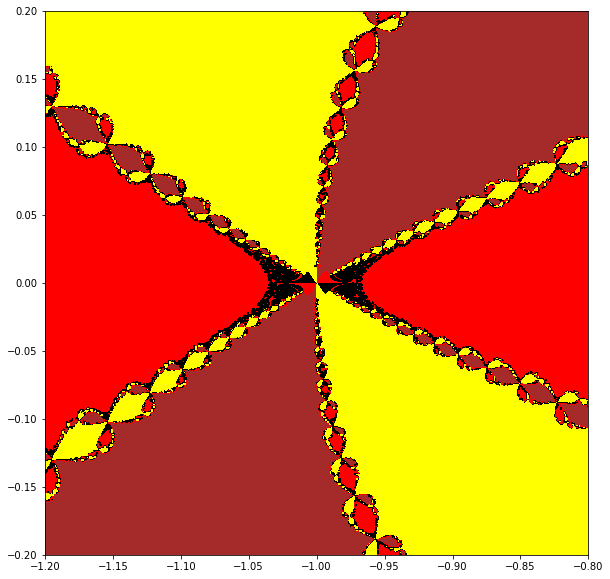

In [4]:
# Zoom in to the region near -1
N = 600  # 800 by 800 is a lot and it takes a few seconds to draw 
x = np.linspace(-1.2,-0.8,N)
y = np.linspace(-0.2,0.2,N)
F = np.zeros((N,N))
# Here is the function and its derivative whose zeros we are looking for
f = lambda x: x ** 3 - 2;
df = lambda x: 3*x**2 ;
# SirIsaac performs one Newton iteration
SirIsaac = lambda x: x - f(x)/df(x);
for k in range(N):
    for i in range(N):
        # We range over all initial estimates in the grid
        z = x[i]+1j*y[k];
        # Hard-wire in 20 iterations (maybe not enough)
        for m in range(20):
            z = SirIsaac( z )
        # After twenty iterations we hope the iteration has settled down, except on
        # the boundary between basins of attraction.
        # The phase (angle) is a likely candidate for a unique identifier for the root
        F[k,i] = np.angle( z ) # Rows, columns
# A magic incantation
X,Y = np.meshgrid( x, y )
plt.figure(figsize=(10,10))
plt.contourf( X, Y, F, levels=[-3,-2,0,2,3], colors=['brown','red','black','yellow','black','blue','black'] )
plt.gca().set_aspect('equal', adjustable='box')

### Looking back at those plots and that code

The first question we should ask ourselves is _is that code correct_? Is it doing what we want?  If we are surprised at anything about that, is the surprise owing to the underlying math, or to some bug or weakness in the code?

We suspect the funny shapes (maybe they look like red and black pantaloons, from a [Harlequin](https://en.wikipedia.org/wiki/Harlequin)?) that don't fit the chain pattern are artifacts of our code, somehow.

Let's zoom in even more, but increase the number of iterations.

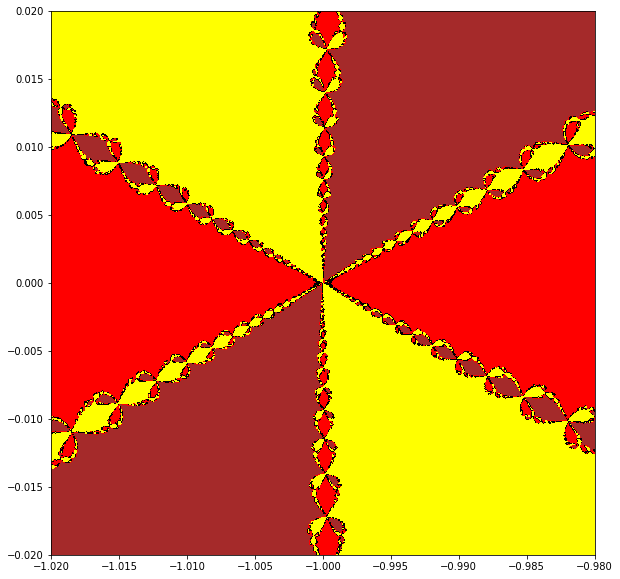

In [5]:
# Zoom in to the region near -1
N = 800  # 800 by 800 is a lot and it takes a few seconds to draw 
x = np.linspace(-1.02,-0.98,N)
y = np.linspace(-0.02,0.02,N)
F = np.zeros((N,N))
# Here is the function and its derivative whose zeros we are looking for
f = lambda x: x ** 3 - 2;
df = lambda x: 3*x**2 ;
# SirIsaac performs one Newton iteration
SirIsaac = lambda x: x - f(x)/df(x);
for k in range(N):
    for i in range(N):
        # We range over all initial estimates in the grid
        z = x[i]+1j*y[k];
        # Hard-wire in 40 iterations (maybe not enough)
        for m in range(40):
            z = SirIsaac( z )
        # After twenty iterations we hope the iteration has settled down, except on
        # the boundary between basins of attraction.
        # The phase (angle) is a likely candidate for a unique identifier for the root
        F[k,i] = np.angle( z ) # Row, column
# A magic incantation
X,Y = np.meshgrid( x, y )
plt.figure(figsize=(10,10))
plt.contourf( X, Y, F, levels=[-3,-2,0,2,3], colors=['brown','red','black','yellow','black','blue','black'] )
plt.gca().set_aspect('equal', adjustable='box')

Right.  Running the code at higher resolution seems to fix the problem.   Now we might trust the picture to feed us questions that have something to do with the math.  Here's one: what's actually happening at $z=-1+0j$?  That is, if we start the iteration there, using exact arithmetic, what would happen?

In the exercises, you are asked to think of some of your own questions.  Experiment with this code; change the parameters, the resolution, the zooming, the function; whatever you like.  Bring out the "sandbag" questions, maybe: what do you notice? What do you see? What do you wonder?

## Variations: Halley's Method, Secant Method, Infinitely Many Others

Newton's method can be understood as replacing the nonlinear equation $f(x)=0$ with a _linear approximation_ $f(a) + f'(a)(x-a) = 0$ and solving that instead; if one starts with $x=a$ as an initial approximation to the root of $f(x)=0$ then hopefully the solution of the linear approximation, namely $x = a - f(a)/f'(a)$, would be an improved approximation to the root.  But there are other methods.  As discussed in the Exercises in the [Rootfinding unit](rootfinding.ipynb), there is also the __secant method__ which uses _two_ initial estimates of the root, say $x_0$ and $x_1$, to generate
\begin{equation}
x_{n+1} = x_n - \frac{ f(x_n)(x_n-x_{n-1})}{f(x_n)-f(x_{n-1})}
\end{equation}
and you can see that instead of having $f'(x_n)$ we instead have the difference quotient---the slope of the secant line---
\begin{equation}
f'(x_n) \approx \frac{ f(x_n)-f(x_{n-1}) }{x_{n}-x_{n-1}}
\end{equation}
playing the same role.  We save the values of $f(x_0)$, $f(x_1)$, $\ldots$ as we go along so we don't have to recompute them; and each iteration costs us only one new evaluation of the function (which can serve as a check on our errors as well) each time.  Newton's method, in contrast, needs an evaluation of $f(x)$ _and_ an evaluation of $f'(x)$ for each iteration, so it costs more per iteration.  The secant method tends to be take more iterations but be faster to compute on each step, so it is frequently faster overall.  We can study "secant fractals" in the same way we studied Newton fractals if we insist on a rule for generating $x_1$ from $x_0$; for instance, we could always take $x_1 = x_0 - f(x_0)/f'(x_0)$ so we would use one Newton iteration to get started.  Frequently this information is available at the beginning, so it isn't much of a "cheat".

We can go the other way: also as discussed in the exercises in the rootfinding unit, there is something known as [_Halley's method_](https://en.wikipedia.org/wiki/Halley%27s_method), named after the astronomer [Edmond Halley](https://en.wikipedia.org/wiki/Edmond_Halley):
\begin{equation}
z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n) - \frac{f(z_n)f''(z_n)}{2f'(z_n)}}
\end{equation}
This requires _two_ derivatives; if one derivative is too expensive, then two is twice too much.  But sometimes derivatives are cheap and this method becomes practical.  Consider for example the task of inverting the function
$f(w) = w\exp(w)-z = 0$; that is, given a value for $z$, find a value of $w$ for which the equation is true. We are computing the [Lambert W function](http://www.orcca.on.ca/LambertW) of z. Since the "expensive" part of the computation of $f(w)$ is the exponential, $\exp(w)$, the derivatives $f'(w) = (1+w)\exp(w)$ and $f''(w) = (2+w)\exp(w)$ are essentially free thereafter; so Halley's method becomes quite attractive, _because it takes even fewer iterations than Newton's method_ (typically) for this function.

An interesting trick (dating at least back to the 1920's) converts Halley's method for $f(z)=0$ into Newton's method for a different function $F(z) = 0$:  put $F(z) = f(z)/\sqrt{f'(z)}$.  Then some algebra shows that Newton's iteration on $F(z)$, namely
\begin{equation}
z_{n+1} = z_n - \frac{F(z_n)}{F'(z_n)}
\end{equation}
is converted (by use of the chain rule to compute $F'(z)$) _exactly_ into Halley's method for $f(z)=0$.
It is quite instructive to compute the Newton fractal for a function, and then compute the Halley fractal for the same function.  You can even use the same imaging code, just by swapping one function for another.

For instance, here is the Newton fractal (Fatou set) for $f(z) = z^{8}+4 z^{7}+6 z^{6}+6 z^{5}+5 z^{4}+2 z^{3}+z^{2}+z$, as computed by Maple's `Fractals:-EscapeTime:-Newton` command

```{image} ../Figures/Fractals/M4Newton.png
:height: 300px
:alt: Mandelbrot 4 Newton Fractal
:align: center
```

and here is the Halley fractal (Fatou set) for the same function, which is also the Newton fractal for $F(z) = f(z)/\sqrt{f'(z)}$.  Again, this was computed by `Fractals:-EscapeTime:-Newton`.

```{image} ../Figures/Fractals/M4Halley.png
:height: 300px
:alt: Mandelbrot 4 Halley Fractal
:align: center
```

In order to _understand_ the differences in the two images, it is necessary to understand what the colors mean; we think that the different shades of orange count the number of iterations to reach each root (but we're not terribly sure: the documentation of that opaque code is not clear on that point).  If that is true, then one can see from the two pictures that Halley's method takes fewer iterations to get a good approximation to a root.  However, the `Fractals:-Escapetime:-Newton` code takes _ten times as long_ for the Halley case, likely because of internal compiler reasons (yes, Maple has a compiler, but it is quite limited).  We ask you to redo these figures yourself in Python, and also to do the secant fractal (not possible in Maple simply by co-opting the `Fractals:-EscapeTime:-Newton` code, as Halley is), and to compare the results.

## Julia sets

The [technical definition given in Wikipedia of a "Julia set"](https://en.wikipedia.org/wiki/Julia_set), named after the mathematician [Gaston Julia](https://en.wikipedia.org/wiki/Gaston_Julia), is pretty opaque.  We will take an explicitly _oversimplified_ view here and not worry about technicalities; we're just going to compute things that are sort of like Julia sets. The basic idea is pretty simple.  If we are given an iteration
\begin{equation}
z_{n+1} = F(z_n)
\end{equation}
starting with $z_0 = $ some critical point (typically $z_0 = 0$) then to find our "Julia sets" we will _run the iteration backwards_.  In the aforementioned technical Wikipedia article this algorithm is mentioned, and the reader is cautioned against it owing to its exponential cost; there are other problems with it as well, but for our purposes---exploration!---we will just implement it and try it out.  We will be able to generate several interesting pictures this way, and begin to develop some insight.

We will restrict ourselves to _polynomial maps_ $F(z_n)$, and we will use NumPy's `roots` command to solve the polynomials.  We'll suggest a method in the exercises that will allow you to extend this to _rational maps_.

First, let's see how to solve polynomials in Python.


In [6]:
import numpy as np

p = np.poly1d( [1, 0, -2, -5 ]); # Newton's original example
print( p )
print( np.roots(p) )
print( p.r )
print( p(p.r) )
# Wilkinson10 = np.poly1d( [1,-55,1320,-18150,157773,-902055,3416930,-8409500,12753576,-10628640,3628800] );
# print( Wilkinson10.r )
# print( Wilkinson10(Wilkinson10.r) )
# Wilkinson20 = np.poly1d( [1, -210, 20615, -1256850, 53327946, -1672280820, 40171771630, -756111184500, 11310276995381, -135585182899530, 1307535010540395, -10142299865511450, 63030812099294896, -311333643161390640, 1206647803780373360, -3599979517947607200, 8037811822645051776, -12870931245150988800, 13803759753640704000, -8752948036761600000, 2432902008176640000] )
# print( Wilkinson20.r )
# print( Wilkinson20(Wilkinson20.r) )

   3
1 x - 2 x - 5
[ 2.09455148+0.j         -1.04727574+1.13593989j -1.04727574-1.13593989j]
[ 2.09455148+0.j         -1.04727574+1.13593989j -1.04727574-1.13593989j]
[ 1.95399252e-14+0.00000000e+00j -1.77635684e-15-1.77635684e-15j
 -1.77635684e-15+1.77635684e-15j]


In [7]:
from numpy.polynomial import Polynomial as Poly
c = np.array( [-5, -2, 0, 1 ] )
p = Poly( c ) # Newton's original example
p
print( p.roots() )
print( p(p.roots()) )

[-1.04727574-1.13593989j -1.04727574+1.13593989j  2.09455148+0.j        ]
[ 5.32907052e-15-3.55271368e-15j  5.32907052e-15+3.55271368e-15j
 -1.77635684e-15+0.00000000e+00j]


Reading the output from those commands, we see that to make a polynomial we call `poly1d` (the 1d means "one-dimensional") with a vector of (monomial basis) coefficients.  Thereafter, we can either call `roots` or simply ask for the roots by using the `.r` method. We can evaluate the polynomial at a vector of values by a call using parentheses: `p(p.r)` evaluates the polynomial at the computed roots; we see that the answers (in this case) are quite small, being essentially on the order of rounding errors. Since polynomials are continuous, we therefore believe that these computed roots might be accurate.  

In truth the story is more complicated than that, but we will save that for your numerical analysis class.

We now see that the `Polynomial` convenience class is supposed to be used instead of `poly1d`.  Fine.  This means writing the coefficients in reverse order, but that is also fine.

What we will do here to run the iteration backward is to take the equation
\begin{equation}
z_{n+1} = F(z_n)
\end{equation}
and _solve_ it (using `roots`) for $z_n$, when we are given $z_{n+1}$.  We'll start with the same $z_0$ that we were using before, and compute all possible $z_{-1}$ values which would give us $z_0 = F( z_{-1} )$.  This will be clearer with an example.

Let's take $F(z) = z^2 + 1.2$.  This is an instance of the Mandelbrot map, with $c=1.2$ being in the Mandelbrot set.  We could solve $z_{n+1} = z_n^2 + 1.2$ just by rearranging the equation: $z_n^2 = z_{n+1}-1.2$ and so by taking square roots we are done.  Notice that there are _two_ possible $z_{n}$ values (call them _preimages_ of $z_{n+1}$).  This is of course because our $F(z)$ is a polynomial of degree two.  Then for each of these two $z_n$ values, there will be two $z_{n-1}$ values, so four $z_{n-1}$ values; then eight $z_{n-2}$ values, and so on.  This is the "exponential growth" that the Wikipedia article warns about.  We shall ignore the warning.

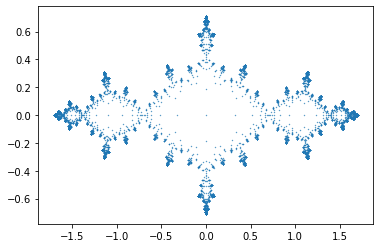

In [8]:
N = 10001  # Make the array of length one more than a multiple of degree d
History = np.zeros(N,dtype=complex)
# History[0] is deliberately 0.0 for this example
# If you want to start at another place, issue 
# the command
# History[0] = whatever you want to start with
here = 0
there = 1
c = [-1.2, 0, 1 ]
d = len(c)-1
while there <= N-d:
    cc = c.copy()
    cc[0] = c[0] - History[here]
    p = Poly( cc );
    rts = p.roots();
    # This loop places those roots in the History array
    for j in range(d):
        # Can you explain to yourself how this code works?
        History[there] = rts[j];
        there += 1;
    here += 1;
    
import matplotlib.pyplot as plt
x = [e.real for e in History]
y = [e.imag for e in History]
plt.scatter( x, y, s=0.5, marker="." )
plt.show()

Here are similar images generated in Maple; one by our own code (which only plots the last half of the table of points), and one by the built-in `Fractals:-EscapeTime:-Julia code`.

```{figure} ../Figures/Fractals/JuliaMaple12.png
---
height: 200px
name: julia_own_code
---
Our own code
```

```{figure} ../Figures/Fractals/JuliaEscapeTimeF12.png
---
height: 300px
name: julia_maple
---
Maple's built-in code
```


## Exercises
1. Write down as many questions as you can about material from this section.
2.
3. 
4. 
5. Write a Python program to animate Newton's method for real functions and real initial estimates in general (the animated GIF at the top of this unit was produced by a Maple program, Student:-Calculus1:-NewtonsMethod, which is quite a useful model).  This exercise asks you to "roll your own" animation.
6. Write your own code for computing Newton fractals, perhaps based on the code above (but at least improve the colour scheme).
7. Compute Newton fractals for several functions of your own choosing. Test your code on the function $f(z) = z^{8}+4 z^{7}+6 z^{6}+6 z^{5}+5 z^{4}+2 z^{3}+z^{2}+z$ used above.
8. Compute Halley fractals for the same functions.
9. Compute secant fractals for the same functions, using the $x_1 = x_0 - f(x_0)/f'(x_0)$ rule to generate the needed second initial estimate.  Try a different rule for generating $x_1$ and see if it affects your fractals.
10. Try a few different values of "c" in the Mandelbrot example above, and generate your own "Julia sets".
11. These are not really Julia sets; they include too much of the history!  Alter the program so that it plots only (say) the last half of the points computed; increase the number of points by a lot, as well.  Compare your figure to (say) the Maple Julia set for c=1.2.  
12. Change the function F to be a different polynomial; find places where both F and F' are zero (if any).  If necessary, change your polynomial so that there is such a "critical point".  Start your iteration there, and go backwards---plot your "Julia set".
13. Extend the program so that it works for _rational_ functions F, say $F(z) = p(z)/q(z)$.  This means solving the polynomial equation $p(z_n) - z_{n+1}q(z_n)=0$ for $z_n$. Try it out on the rational functions you get from Newton iteration on polynomial (or rational!) functions; or on Halley iteration on polynomial functions.  Try any of the that arise from the methods that you can find listed in [Revisiting Gilbert Strang's "A Chaotic Search for _i_"](https://doi.org/10.1145/3363520.3363521). 
14. Read the [Wikipedia entry on Julia sets](https://en.wikipedia.org/wiki/Julia_set); it ought to be a little more intelligible now (but you will see that there are still lots of complications left to explain). One of the main items of interest is the theorem that states that the Fatou sets all have a _common boundary_.  This means that if the number of components is $3$ or more, then the Julia set (which is that boundary!) _must be a fractal_.